In [1]:
#import dependencies
import pandas as pd

In [24]:
#read our csvs
df = pd.read_csv("/Users/jlh/global-health-map/raw_data/lifeExpectancyAtBirth.csv")
dfHale = pd.read_csv("/Users/jlh/global-health-map/raw_data/HALElifeExpectancyAtBirth.csv")
df.head()

,Location,Period,Indicator,Dim1,First_Tooltip
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015,Life expectancy at birth (years),Male,61.04


In [26]:
#check the value counts. one of these data frames has more entries than the other. perhaps a typo? wrong entry?
df["Location"].value_counts()

Ethiopia              12
Tunisia               12
Malawi                12
Kazakhstan            12
Finland               12
                      ..
Italy                 12
Iceland               12
Iraq                  12
Sudan (until 2011)     6
Sudan                  6
Name: Location, Length: 184, dtype: int64

In [27]:
#compare this dataframe to the other. prior to cleaning, we found that canada had an entry from 1920. delete it.
dfHale["Location"].value_counts()

Ethiopia              12
Tunisia               12
Malawi                12
Kazakhstan            12
Finland               12
                      ..
Italy                 12
Iceland               12
Iraq                  12
Sudan (until 2011)     6
Sudan                  6
Name: Location, Length: 184, dtype: int64

In [29]:
#we used pgAdmin and postgreSQL to create this csv. this is easier done using pandas. 
df_combined = pd.read_csv("/Users/jlh/global-health-map/data/combined_life_expectancy.csv")
df_combined

,location,period,gender,life_expectancy,healthy_life_expectancy
0,Afghanistan,2019,Both sexes,63.21,53.95
1,Afghanistan,2019,Male,63.29,54.73
2,Afghanistan,2019,Female,63.16,53.15
3,Afghanistan,2015,Both sexes,61.65,52.60
4,Afghanistan,2015,Male,61.04,52.78
...,...,...,...,...,...
2191,Zimbabwe,2010,Male,49.58,44.25
2192,Zimbabwe,2010,Female,53.21,46.12
2193,Zimbabwe,2000,Both sexes,46.57,41.03
2194,Zimbabwe,2000,Male,45.15,40.39


In [43]:
#create a csv with gendered expectancies
df_gender_separated = df_combined.loc[df_combined["gender"] != "Both sexes"]
df_gender_separated

,location,period,gender,life_expectancy,healthy_life_expectancy
1,Afghanistan,2019,Male,63.29,54.73
2,Afghanistan,2019,Female,63.16,53.15
4,Afghanistan,2015,Male,61.04,52.78
5,Afghanistan,2015,Female,62.35,52.44
7,Afghanistan,2010,Male,59.60,51.51
...,...,...,...,...,...
2189,Zimbabwe,2015,Female,60.96,52.59
2191,Zimbabwe,2010,Male,49.58,44.25
2192,Zimbabwe,2010,Female,53.21,46.12
2194,Zimbabwe,2000,Male,45.15,40.39


In [42]:
#import more dependencies. 
import matplotlib.pyplot as plt

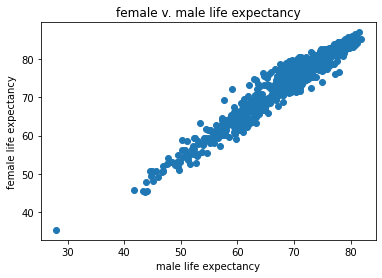

In [50]:
#using matplotlib to plot female v. male life expectancy
df_male = df_gender_separated.loc[df_gender_separated["gender"] == "Male"]
df_female = df_gender_separated.loc[df_gender_separated["gender"] == "Female"]
df_male
df_female
plt.scatter(df_male["life_expectancy"], df_female["life_expectancy"])
plt.ylabel("female life expectancy")
plt.xlabel("male life expectancy")
plt.title("female v. male life expectancy");

In [52]:
#import statistics
import numpy as np
import scipy.stats as st
from scipy import stats

In [54]:
#use scipy.stats to calculate correlation. .97 is an incredibly high correlation.
correlation = st.pearsonr(df_male["life_expectancy"], df_female["life_expectancy"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.97


In [55]:
#begin to create a regression line. 
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df_male["life_expectancy"], df_female["life_expectancy"])

the r-squared is: 0.9414193557814184
y = 1.0x + 4.66


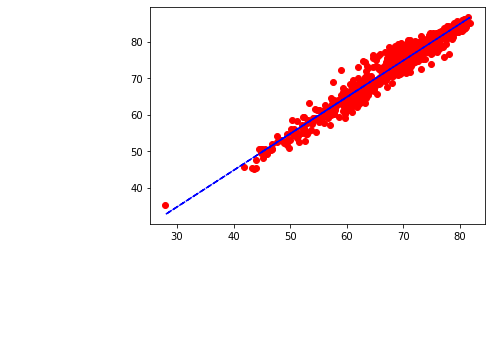

In [60]:
#regression line and matplotlib to plot it on top of our data.
regress_values = df_male["life_expectancy"] * slope + intercept
#create a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
x = df_male["life_expectancy"]
y = df_female["life_expectancy"]
#create the scatterplot
plt.scatter(x, y, color="r")
#create the line
plt.plot(x, regress_values, "--", color='b')
print(f"the r-squared is: {rvalue**2}")
#annotate - atm missing. oops!
plt.annotate(line_eq,(0,0), fontsize=15, color='r')
print(line_eq)
plt.show()